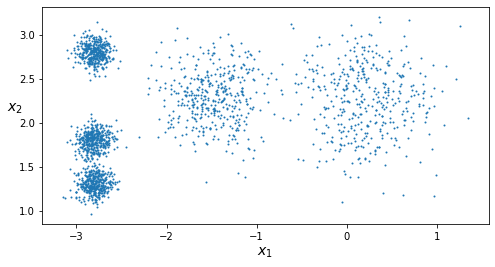

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)

# save_fig("blobs_diagram")
plt.show()

In [24]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters = k).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [25]:
np.unique(kmeans_per_k[3].labels_)

array([0, 1, 2, 3])

In [35]:
idx = 5
print("array: ",kmeans_per_k[idx].labels_)
print("min: ",np.min(kmeans_per_k[idx].labels_))
print("max: ",np.max(kmeans_per_k[idx].labels_))


array:  [5 1 4 ... 2 0 1]
min:  0
max:  5


In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(X, kmeans_per_k[6].labels_)

0.6070979466596362

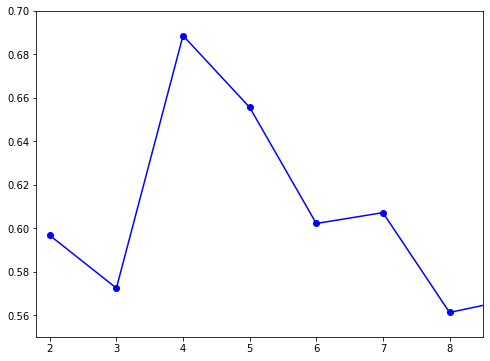

In [37]:
silhouette_scores=[silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8,6))
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.plot(range(2,10), silhouette_scores, "bo-")

plt.show()

In [38]:
[silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6070979466596362,
 0.5611944799905689,
 0.567647042788722]

In [39]:
len([silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]])

8

In [40]:
len(silhouette_samples(X, kmeans_per_k[5].labels_))

2000

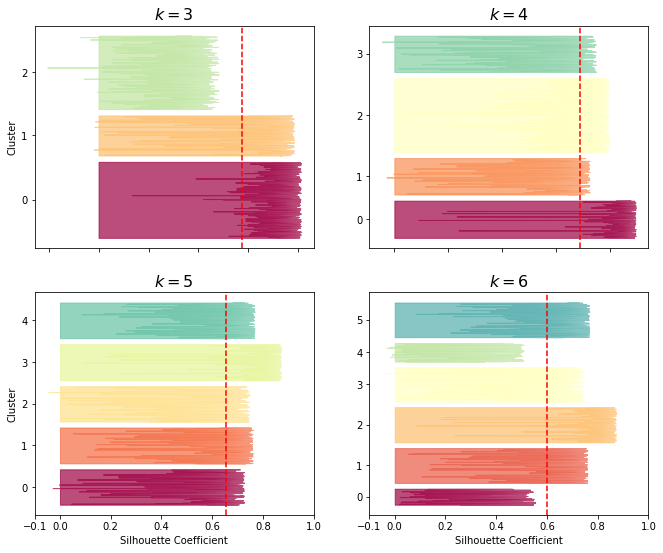

In [41]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
#         coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), -0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_diagram")
plt.show()

In [42]:
test_arr = np.arange(1, 1000)
test_arr.reshape(-1, 3).shape

(333, 3)

In [43]:
from matplotlib.image import imread
import os

image = imread(os.path.join("datasets", "office", "Capture.PNG"))
image.shape

(538, 545, 4)

In [47]:
X = image.reshape(-1, 4)

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmean = KMeans(n_clusters=n_clusters).fit(X)
    segmented_img = kmean.cluster_centers_[kmean.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))


In [45]:
kmean = KMeans(n_clusters=3).fit(X)
# segmented_img = kmeans.cluster_centers_[kmean.labels_]
# segmented_img.reshape(image.shape)
kmean.cluster_centers_

array([[0.25893438, 0.30689833, 0.35954174, 1.        ],
       [0.10794713, 0.14513755, 0.18291678, 1.        ],
       [0.7029942 , 0.8625628 , 0.73442245, 1.        ]], dtype=float32)

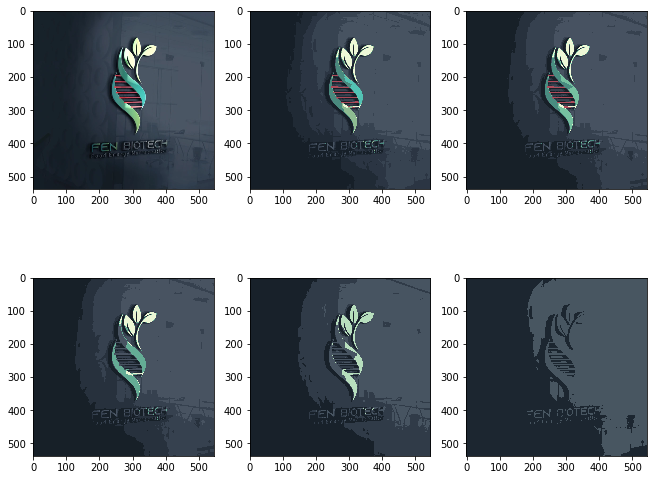

In [48]:
plt.figure(figsize=(11, 9))

plt.subplot(231)
plt.imshow(image)

for idx, segmented_img in enumerate(segmented_imgs):
    plt.subplot(232 + idx)
    plt.imshow(segmented_img.reshape(image.shape))

plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits)

log_clf = LogisticRegression().fit(X_digits_train, y_digits_train)
print("baseline score: ", log_clf.score(X_digits_test, y_digits_test) * 100)

baseline score:  94.66666666666667


C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [18]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmean", KMeans(n_clusters=50)),
    ("LogRegression", LogisticRegression(multi_class="ovr", solver = "liblinear"))
])

pipeline.fit(X_digits_train, y_digits_train)
print("pipeline score:", pipeline.score(X_digits_test, y_digits_test))

pipeline score: 0.9733333333333334


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmean__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 4, verbose=2, n_jobs = -1)
grid_clf.fit(X_digits, y_digits)

Fitting 4 folds for each of 98 candidates, totalling 392 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 392 out of 392 | elapsed:  1.5min finished
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kmean',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('LogRegression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,

In [20]:
grid_clf.best_params_

{'kmean__n_clusters': 68}

In [21]:
grid_clf.best_estimator_.fit(X_digits_train, y_digits_train)

print("Grid search score: ", grid_clf.best_estimator_.score(X_digits_test, y_digits_test))

Grid search score:  0.9777777777777777


In [22]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.08)

dbscan = DBSCAN(eps=0.06, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.06, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [23]:
len(dbscan.core_sample_indices_)

737

In [24]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [25]:
len(dbscan.components_)

737

In [26]:
X[dbscan.core_sample_indices_[0]]

array([2.03405137, 0.32084007])

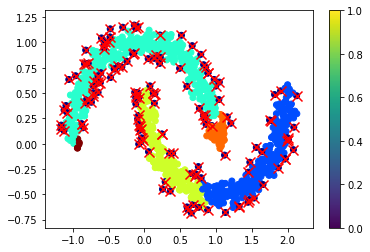

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="jet")
noise_idx = dbscan.labels_ == -1
plt.scatter(X[noise_idx, 0], X[noise_idx, 1], c="r", marker="x", s=100)
plt.colorbar()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0,0,1,1,1,1])

sss = StratifiedShuffleSplit(n_splits=3, test_size=2)
sss.get_n_splits(X, y)

3

In [15]:
for train_idx, test_idx in sss.split(X, y):
    print("train: ", train_idx, " test ", test_idx, "")

train:  [1 4 3 5]  test  [2 0] 
train:  [1 3 2 5]  test  [4 0] 
train:  [0 2 4 5]  test  [1 3] 


In [16]:
from sklearn.datasets import fetch_olivetti_faces

faces_obj = fetch_olivetti_faces()

In [17]:
faces_obj.data.shape

(400, 4096)

In [18]:
faces_obj.target.shape

(400,)

In [49]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=50)

for train_cross_idx, test_idx in sss.split(faces_obj.data, faces_obj.target):
    Faces_train_cross_X = faces_obj.data[train_cross_idx]
    Faces_train_cross_y = faces_obj.target[train_cross_idx]
    Faces_test_X = faces_obj.data[test_idx]
    Faces_test_y = faces_obj.target[test_idx]

sss = StratifiedShuffleSplit(n_splits=1, test_size=50)

for train_idx, cross_idx in sss.split(Faces_train_cross_X, Faces_train_cross_y):
    Faces_train_X = Faces_train_cross_X[train_idx]
    Faces_train_y = Faces_train_cross_y[train_idx]
    Faces_cross_X = Faces_train_cross_X[cross_idx]
    Faces_cross_y = Faces_train_cross_y[cross_idx]


In [50]:
print("Faces train shape: ", Faces_train_X.shape, ", traget shape: ", Faces_train_y.shape)
print("Faces cross shape: ", Faces_cross_X.shape, ", traget shape: ", Faces_cross_y.shape)
print("Faces test shape: ", Faces_test_X.shape, ", traget shape: ", Faces_test_y.shape)


Faces train shape:  (300, 4096) , traget shape:  (300,)
Faces cross shape:  (50, 4096) , traget shape:  (50,)
Faces test shape:  (50, 4096) , traget shape:  (50,)


In [51]:
kmeans_per_k = [KMeans(n_clusters=k, n_jobs=-1).fit(Faces_train_X) for k in range(40, 80)]

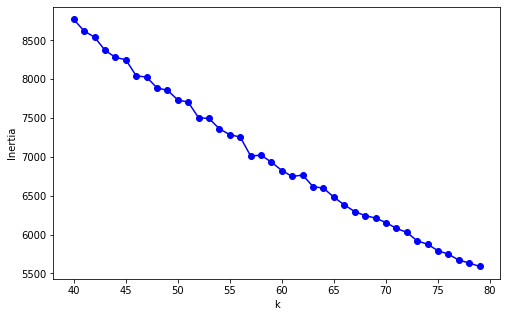

In [52]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8,5))
plt.plot(range(40, 80), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.show()

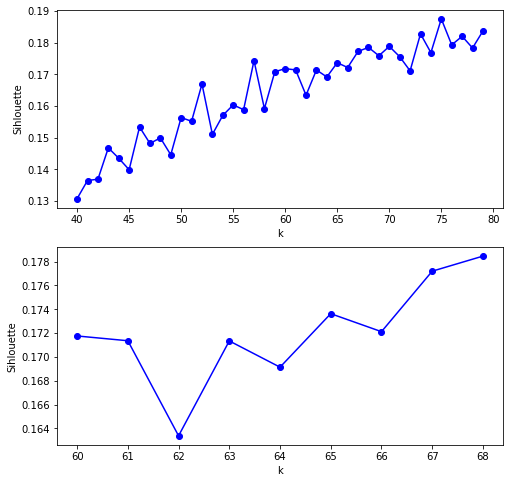

In [53]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(Faces_train_X, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(range(40, 80), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Sihlouette")

plt.subplot(212)
plt.plot(range(60, 69), silhouette_scores[(60 - 40):(69-40)], "bo-")
plt.xlabel("k")
plt.ylabel("Sihlouette")

plt.show()

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
Faces_train_reduced = tsne.fit_transform(Faces_train_X)

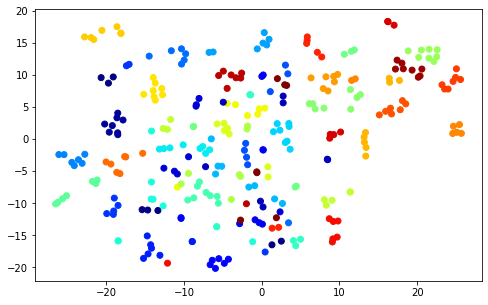

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(Faces_train_reduced[:, 0], Faces_train_reduced[:, 1], c=Faces_train_y, cmap = "jet")

In [54]:
def draw_faces(faces_imgs):
    number_of_rows = faces_imgs.shape[0]
    elements_in_row = faces_imgs.shape[1]
    plt.figure(figsize=(elements_in_row * 4, number_of_rows * 4))
    for idx_row in range(0, faces_imgs.shape[0]):
         for idx_col in range(0, faces_imgs.shape[1]):
            if(faces_imgs[idx_row, idx_col].mean()):
                plt.subplot(number_of_rows, elements_in_row, idx_row * elements_in_row + idx_col + 1)
                plt.imshow(faces_imgs[idx_row, idx_col].reshape(64,64), cmap="gray")
                plt.axis("off")

    plt.show()
    
def build_2d_faces_arr(faces_set, labels):
    unique_elements, counts_elements = np.unique(labels, return_counts=True)
    elements_in_row = np.max(counts_elements)
#     number_of_rows = len(unique_elements)
    number_of_rows = np.max(unique_elements) + 1

    faces_imgs = np.zeros((number_of_rows, elements_in_row, 4096))
    for idx_row in range(0, number_of_rows):
        for idx_col, face in enumerate(faces_set[labels == idx_row]):
            faces_imgs[idx_row, idx_col] = face
    
    return faces_imgs

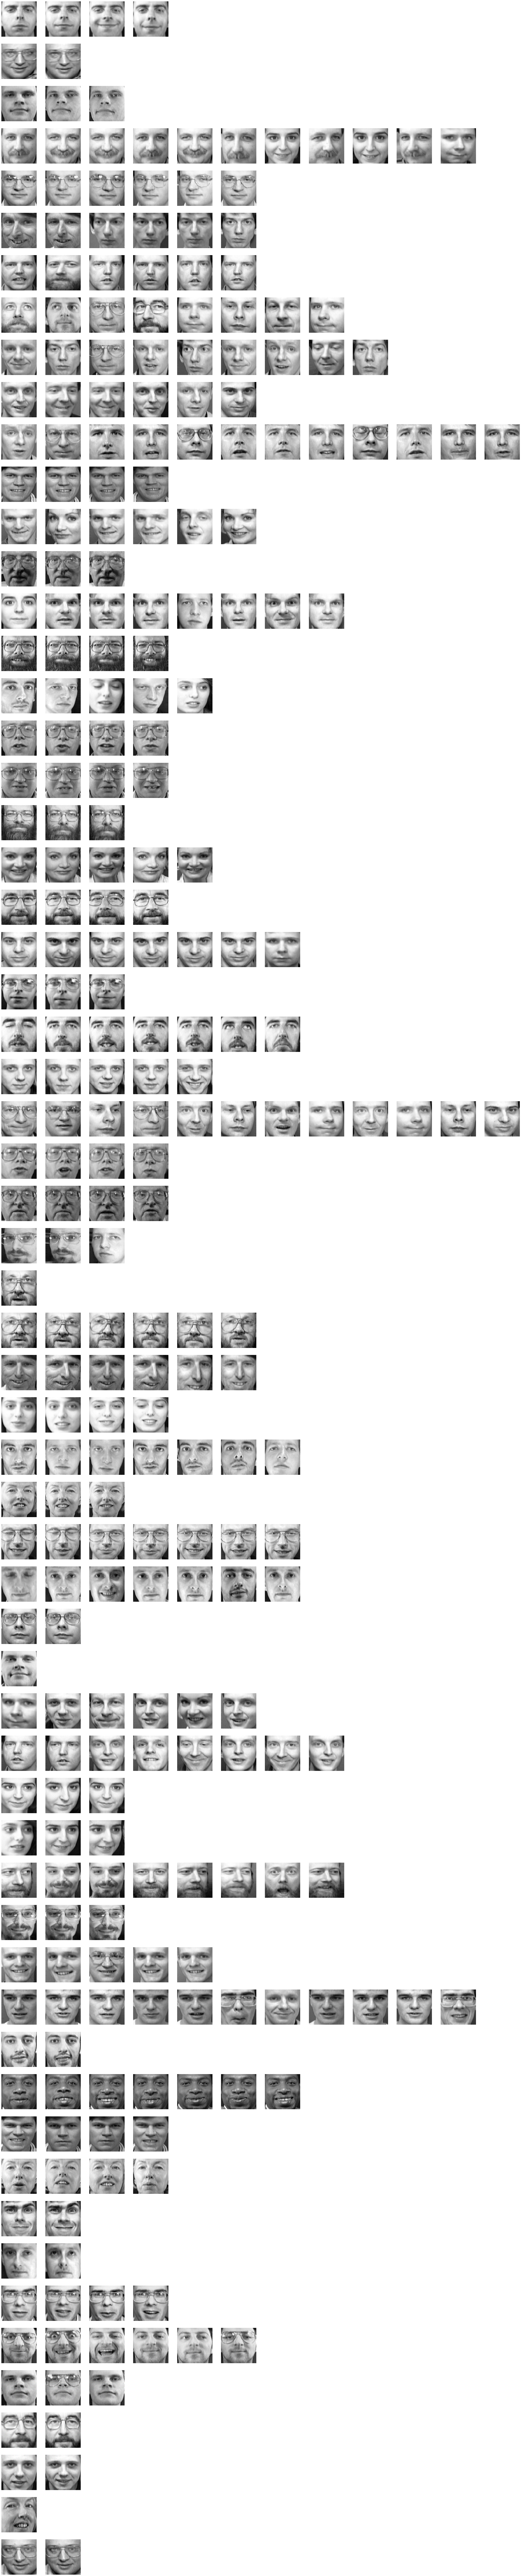

In [55]:
idx_to_visualize = 61 - 40

faces_set = build_2d_faces_arr(Faces_train_X, kmeans_per_k[idx_to_visualize].labels_)
draw_faces(faces_set)

In [57]:
print("original faces array", Faces_train_X.shape)
print("refactored faces array", faces_set.shape)

original faces array (300, 4096)
refactored faces array (61, 12, 4096)


In [121]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=2000)
rnd_clf.fit(Faces_train_X, Faces_train_y)
print("baseline: ", rnd_clf.score(Faces_cross_X, Faces_cross_y))

baseline:  0.92


In [86]:
log_clf = LogisticRegression(multi_class="ovr", solver="liblinear", max_iter=1000, n_jobs=-1, verbose=2)
log_clf.fit(Faces_train_X, Faces_train_y)
print("baseline score: ", log_clf.score(Faces_cross_X, Faces_cross_y))

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]baseline score:  0.96


In [128]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=55, n_jobs=-1)),
    ("log", LogisticRegression(multi_class="ovr", solver="liblinear", max_iter=200, n_jobs=-1, verbose=2))
])

pipeline.fit(Faces_train_X, Faces_train_y)
print("pipeline score: ", pipeline.score(Faces_cross_X, Faces_cross_y) * 100)

[LibLinear]pipeline score:  92.0


C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [124]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(50, 70))
grid_clf = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_clf.fit(Faces_train_X, Faces_train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.5min finished
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=65, n_init=10,
                                               n_jobs=-1,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('log',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
          

In [125]:
grid_clf.best_params_

{'kmeans__n_clusters': 65}

In [126]:
print("grid search clf:", grid_clf.best_estimator_.score(Faces_cross_X, Faces_cross_y))

grid search clf: 0.94


In [129]:
# ---- Gaussian

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
Faces_train_reduced = pca.fit_transform(Faces_train_X)
print("PCA reduced down to ", pca.n_components_, " components")

PCA reduced down to  210  components


In [61]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, verbose=2)
gm.fit(Faces_train_reduced)


Initialization 0
Initialization converged: True	 time lapse 0.28099s	 ll 1182.63560


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=40, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=2, verbose_interval=10, warm_start=False,
                weights_init=None)

In [62]:
print("converged ", gm.converged_)
print("iteration ", gm.n_iter_)
print("weights ", gm.weights_, " (total number ", len(gm.weights_), ")")
print("means ", gm.means_)
print("covariance ", (gm.covariances_))


converged  True
iteration  2
weights  [0.00333333 0.04666667 0.02666667 0.05       0.02333333 0.07666667
 0.03666667 0.05333333 0.00666667 0.02       0.01333333 0.03666667
 0.03666667 0.02666667 0.02333333 0.02666667 0.02333333 0.01
 0.02666667 0.01333333 0.04       0.05666667 0.00666667 0.01333333
 0.01333333 0.01666667 0.02333333 0.01333333 0.02666667 0.01
 0.01333333 0.02666667 0.01333333 0.02333333 0.02       0.02666667
 0.02333333 0.03       0.01       0.01333333]  (total number  40 )
means  [[-7.81905651e+00  9.57922935e-01 -4.46681547e+00 ... -2.43202671e-02
  -4.29196469e-02 -8.17094967e-02]
 [ 4.00263868e+00  1.25571162e-01 -6.69131214e-01 ...  2.50250867e-02
  -1.60619851e-02  1.60708979e-02]
 [-6.67404908e-01  1.34962417e+00 -6.20600751e-01 ... -1.11803019e-02
   8.85668966e-02 -4.69016293e-02]
 ...
 [ 8.56588078e+00  5.21417805e-01 -1.66349943e-01 ... -2.90913801e-02
   3.64267811e-03 -2.38310488e-02]
 [-1.95763346e+00  2.01154180e+00  3.02714372e+00 ... -5.39182577e-03
   

In [63]:
Faces_train_recovered = pca.inverse_transform(Faces_train_reduced)

original faces


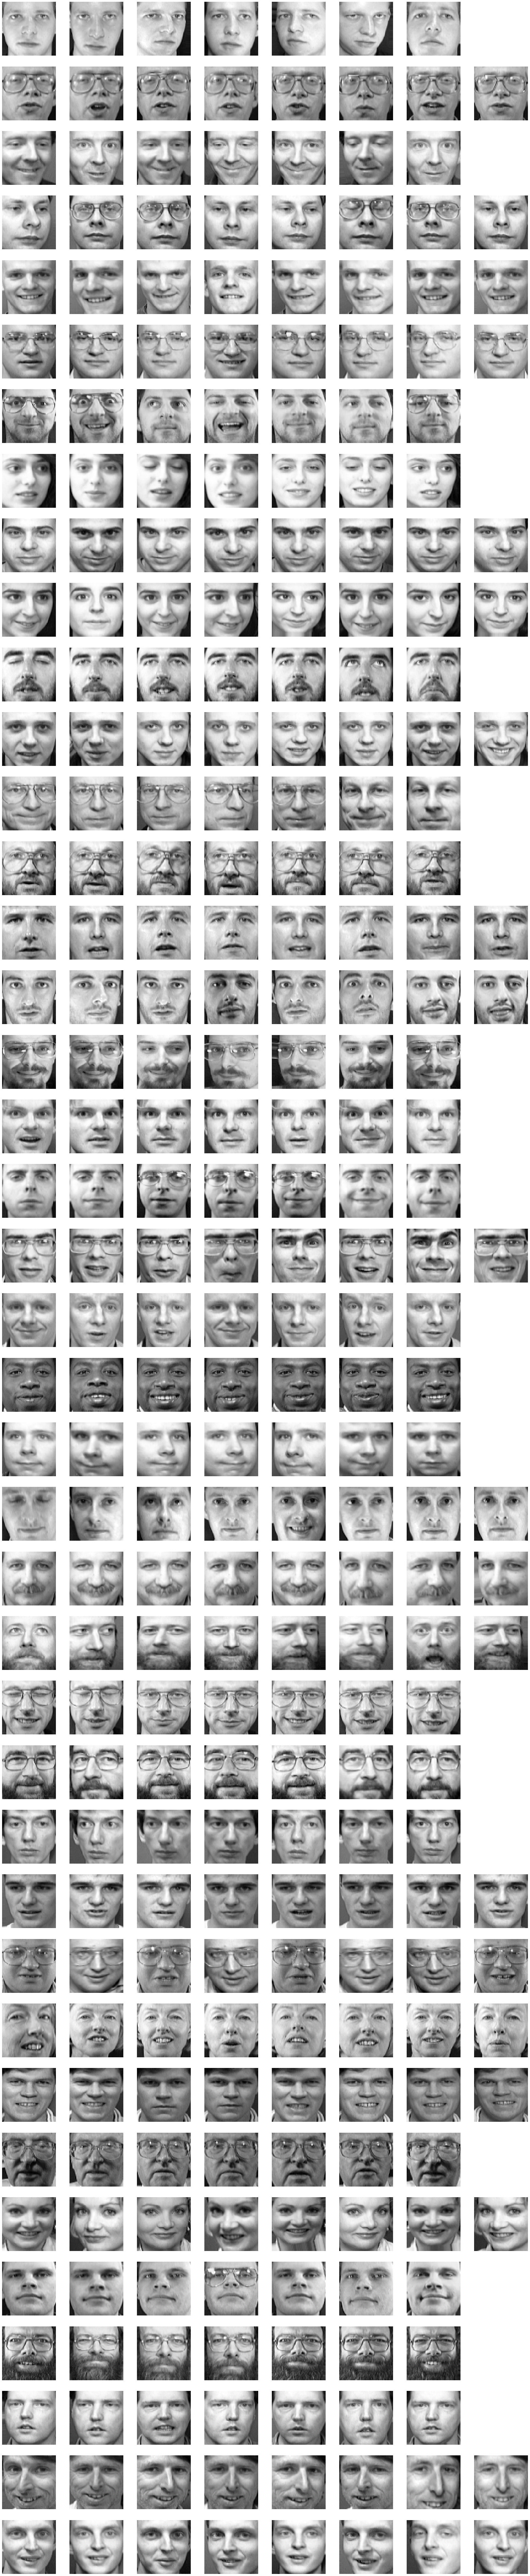

In [64]:
print("original faces")
faces_set = build_2d_faces_arr(Faces_train_X, Faces_train_y)
draw_faces(faces_set)

faces recovered from PCA


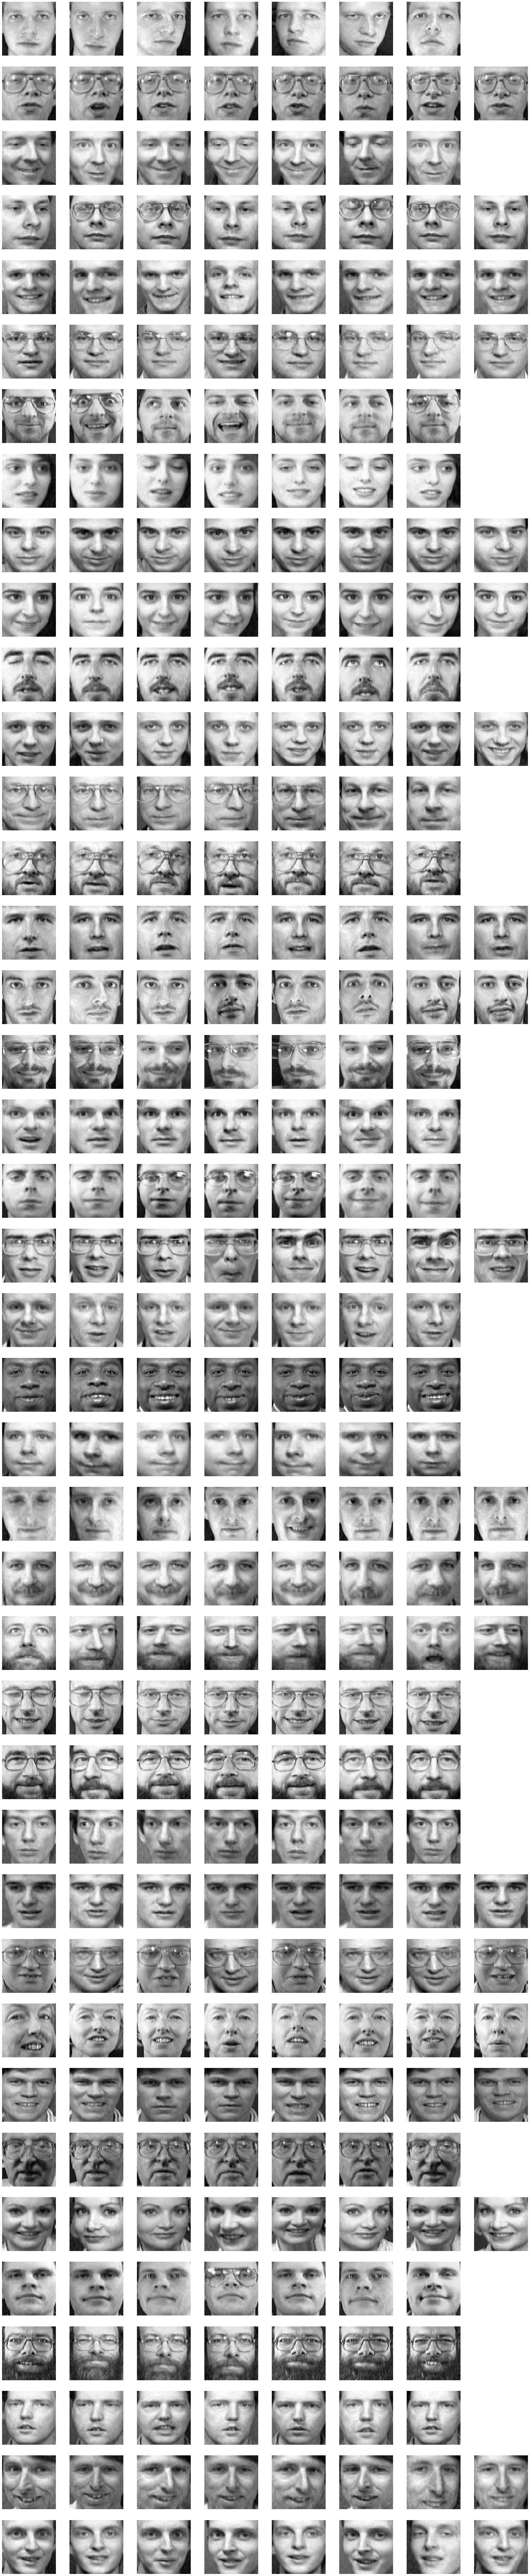

In [65]:
print("faces recovered from PCA")
faces_set = build_2d_faces_arr(Faces_train_recovered, Faces_train_y)
draw_faces(faces_set)

In [168]:
Faces_generated_X, Faces_generated_y = gm.sample(10)
Faces_generated_recovered_X = pca.inverse_transform(Faces_generated_X)

faces generated by GaussianMixture


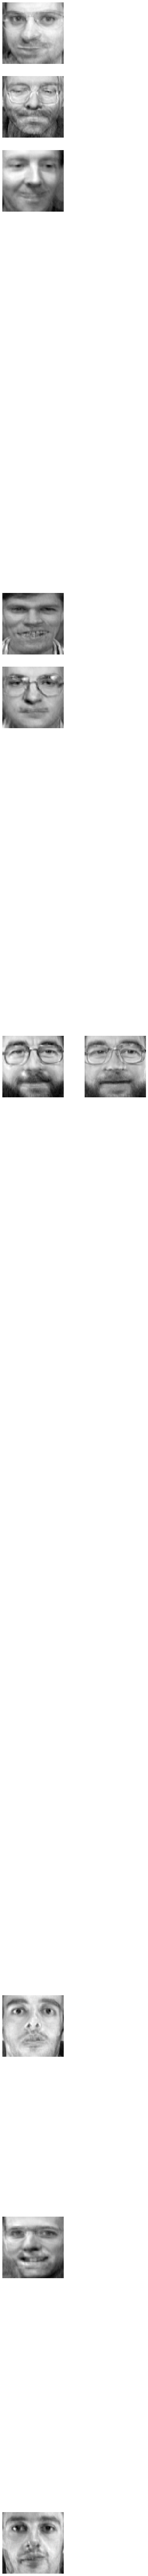

In [273]:
print("faces generated by GaussianMixture")
faces_set = build_2d_faces_arr(Faces_generated_recovered_X, Faces_generated_y)
draw_faces(faces_set)

In [181]:
Faces_generated_X.shape

(10, 211)

In [182]:
Faces_generated_y

array([ 5,  6,  7, 13, 14, 19, 19, 32, 35, 39])

In [172]:
faces_set.shape

(9, 2, 4096)

In [191]:
print("per sample average log-likelyhood: ", gm.score(Faces_train_reduced))
print("average across all samples: ", np.mean(gm.score_samples(Faces_train_reduced)))

per sample average log-likelyhood:  1194.4102192666007
average across all samples:  1194.4102192666007


In [244]:
gm.score_samples(Faces_train_reduced)

array([1165.381869  , 1212.54886345, 1196.89590542, 1226.72872029,
       1165.38186818, 1169.71636484, 1148.143192  , 1220.14857525,
       1176.42670541, 1189.31192825, 1220.16837367, 1197.58524953,
       1204.47884892, 1234.64671374, 1220.16837388, 1226.08550061,
       1219.36898123, 1199.2891316 , 1241.6188314 , 1221.05507461,
       1134.92978408, 1134.92973792, 1176.42670103, 1205.04918161,
       1204.47885017, 1204.58130542, 1189.31192902, 1176.42670003,
       1205.04918093, 1197.58524862, 1134.92973505, 1197.58524965,
       1165.38186952, 1204.09224234, 1203.53064837, 1134.92972895,
       1234.35853191, 1148.14319102, 1169.71635229, 1148.14319521,
       1205.04918289, 1219.33927345, 1242.50682143, 1134.92972911,
       1165.38186947, 1219.36897975, 1169.71636426, 1204.58130642,
       1213.4123121 , 1148.14319533, 1128.27779095, 1169.71634744,
       1197.58524865, 1219.3689803 , 1226.08550045, 1242.50682166,
       1226.08550091, 1199.28914361, 1212.54886407, 1235.88324

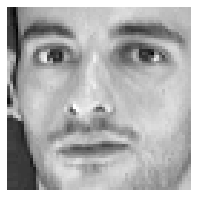

In [251]:
# Face_to_modify = Faces_train_X[0]
draw_faces(build_2d_faces_arr(np.array([Faces_train_X[0]]), np.array([Faces_train_y[0]])))

In [286]:
def DarkenImage(img, darkness):
    return img * (100 - darkness) / 100
def rot90(img):
    reshaped = img.reshape(64, 64)
    return reshaped.T.ravel()
def FlipV(img):
    reshaped = img.reshape(64, 64)
    return np.flipud(reshaped).ravel()


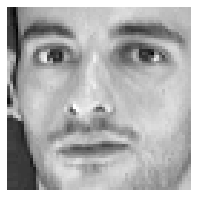

In [287]:
Face_darkened = np.array([DarkenImage(np.array(Faces_train_X[0]), -99)])
draw_faces(build_2d_faces_arr(Face_darkened, np.array([Faces_train_y[0]])))

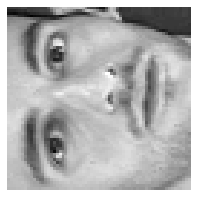

In [330]:
Face_before_modification = np.array([Faces_train_X[0]])
Face_after_modification = np.array([rot90(Face_before_modification)])
draw_faces(build_2d_faces_arr(Face_after_modification, np.array([Faces_train_y[0]])))


In [331]:
print("average Gaussian Mixture score: ", gm.score(Faces_train_reduced))
ten_percent_of_gm = np.percentile(gm.score_samples(Faces_train_reduced), 10)
print("10% from average Gaussian Mixture score: ", ten_percent_of_gm)
gscore_before = gm.score(pca.transform(Face_before_modification))
print("average Gaussian Mixture score on before modification: ", gscore_before)
gscore_after = gm.score(pca.transform(Face_after_modification))
print("average Gaussian Mixture score on after modification: ", gscore_after)

if(gscore_after < ten_percent_of_gm):
    print("outlier")
else:
    print("inlier")

average Gaussian Mixture score:  1194.4102192666007
10% from average Gaussian Mixture score:  1134.9297385753976
average Gaussian Mixture score on before modification:  1165.3817574349305
average Gaussian Mixture score on after modification:  -43402521.56063333
outlier


In [372]:
a = np.array([[20,10,10,10]])
np.percentile(a, 100, axis=1)

array([20.])

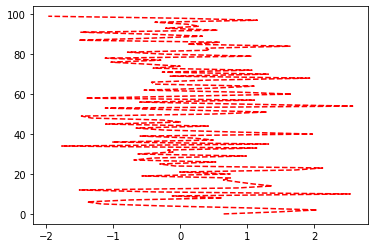

In [377]:
import numpy
from matplotlib import pyplot, transforms

data = numpy.random.randn(100)

# first of all, the base transformation of the data points is needed
base = pyplot.gca().transData
rot = transforms.Affine2D().rotate_deg(90)

# define transformed line
line = pyplot.plot(data, 'r--', transform= rot + base)
# or alternatively, use:
# line.set_transform(rot + base)

pyplot.show()

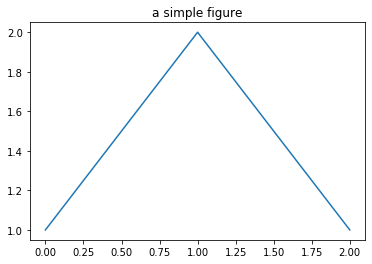

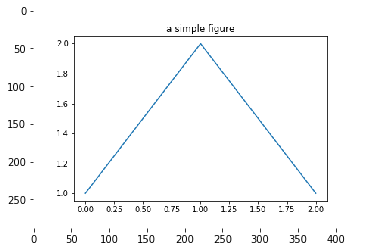

In [383]:
# make an agg figure
fig, ax = plt.subplots()
ax.plot([1, 2, 1])
ax.set_title('a simple figure')
fig.canvas.draw()

# grab the pixel buffer and dump it into a numpy array
X = np.array(fig.canvas.renderer.buffer_rgba())

# now display the array X as an Axes in a new figure
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, frameon=False)
ax2.imshow(X)
plt.show()

Train set mean squared error:  0.00018846548
Test set mean squared error:  0.002056752
Face train[0] mean squared error:  6.837313e-05


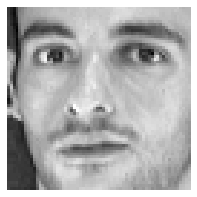

Face train[0] rotated mean squared error:  0.007534218


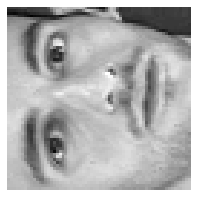

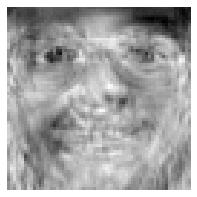

In [395]:
from sklearn.metrics import mean_squared_error

msq_set = Faces_train_X
print("Train set mean squared error: ", mean_squared_error(msq_set, pca.inverse_transform(pca.transform(msq_set))))

msq_set = Faces_test_X
print("Test set mean squared error: ", mean_squared_error(msq_set, pca.inverse_transform(pca.transform(msq_set))))

msq_set = [Faces_train_X[0]]
print("Face train[0] mean squared error: ", mean_squared_error(msq_set, pca.inverse_transform(pca.transform(msq_set))))
draw_faces(build_2d_faces_arr(np.array(pca.inverse_transform(pca.transform(msq_set))), np.array([Faces_train_y[0]])))

msq_set = [rot90(Faces_train_X[0])]
print("Face train[0] rotated mean squared error: ", mean_squared_error(msq_set, pca.inverse_transform(pca.transform(msq_set))))
draw_faces(build_2d_faces_arr(np.array(msq_set), np.array([Faces_train_y[0]])))
draw_faces(build_2d_faces_arr(np.array(pca.inverse_transform(pca.transform(msq_set))), np.array([Faces_train_y[0]])))



---------------- Gaussian mixture (noPCA)

In [66]:
gm_noPCA = GaussianMixture(n_components=40, verbose=2)
gm_noPCA.fit(Faces_train_X)


Initialization 0
Initialization converged: True	 time lapse 381.27814s	 ll 24453.94060


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=40, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=2, verbose_interval=10, warm_start=False,
                weights_init=None)

faces generated by GaussianMixture


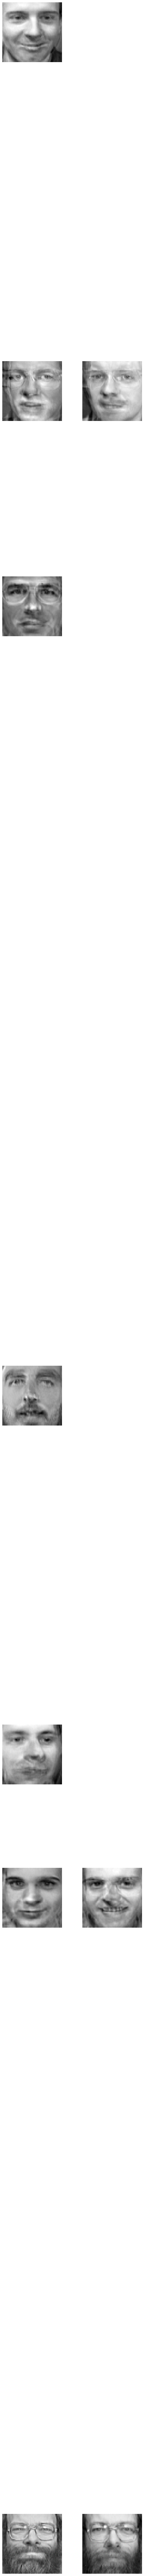

In [69]:
Faces_generated_X, Faces_generated_y = gm_noPCA.sample(10)
print("faces generated by GaussianMixture")
faces_set = build_2d_faces_arr(Faces_generated_X, Faces_generated_y)
draw_faces(faces_set)